Conectarnos a BigQuery

In [16]:
from google.oauth2 import service_account ## librería para conectarnos a bigquery

key_path = "local/datapat-dap8-1a7c8bb9f202.json"

credentials = service_account.Credentials.from_service_account_file(key_path)


In [17]:
from google.cloud import bigquery

project_id = 'datapat-dap8'

client = bigquery.Client(credentials= credentials,project=project_id)


In [21]:
query_job = client.query(
    """
    SELECT *
    FROM datapat-dap8.ventasdatpath.ventas_datapath
   """)
results = query_job.result()


In [22]:
df_ventas=[]
for element in results:
    df_ventas.append(list(element))


In [24]:
df_ventas

[[datetime.date(2023, 1, 4),
  'Jeisser Augusto Asto Sifuentes',
  'Data Analyst Program II Edición',
  'Maria Cisneros',
  700.0,
  350.0,
  'Tiktok',
  'Naomi Colan',
  2.34,
  8.9973],
 [datetime.date(2023, 1, 20),
  'Esteban Vargas',
  'Data Engineer Program II Edición',
  'Maria Cisneros',
  450.0,
  300.0,
  'Tiktok',
  'Flavia Avanto',
  2.5246,
  9.707087],
 [datetime.date(2023, 3, 25),
  'Gianella Matamoros Jara',
  'Data Engineer Program II Edición',
  'Maria Cisneros',
  450.0,
  300.0,
  'Youtube',
  'Flavia Avanto',
  3.235,
  12.438575],
 [datetime.date(2023, 1, 1),
  'Kenyo Harold Cano Campos',
  'Data Analyst Program I Edición',
  'Fredy Saavedra',
  600.0,
  450.0,
  'Facebook',
  'Flavia Avanto',
  0.972,
  3.73734],
 [datetime.date(2023, 3, 2),
  'Randy Leonel Barberena Morera',
  'Data Scientist Program I Edición',
  'Fredy Saavedra',
  850.0,
  800.0,
  'Facebook',
  'Naomi Colan',
  3.234526,
  12.43675247],
 [datetime.date(2023, 3, 12),
  'Fabian Calderon',
  'Da

In [25]:
import pandas as pd
df_ventas=pd.DataFrame(
            df_ventas,
            columns=["fecha_matricula",
                     "nombreCliente",
                     "programa",
                     "nombreVendedor",
                     "inversion",
                     "montofinalventa",
                     "plataforma",
                     "communityManager",
                     "costoUSD",
                     "costoSoles"
                     ])


In [26]:
df_ventas

,fecha_matricula,nombreCliente,programa,nombreVendedor,inversion,montofinalventa,plataforma,communityManager,costoUSD,costoSoles
0,2023-01-04,Jeisser Augusto Asto Sifuentes,Data Analyst Program II Edición,Maria Cisneros,700.0,350.0,Tiktok,Naomi Colan,2.340000,8.997300
1,2023-01-20,Esteban Vargas,Data Engineer Program II Edición,Maria Cisneros,450.0,300.0,Tiktok,Flavia Avanto,2.524600,9.707087
2,2023-03-25,Gianella Matamoros Jara,Data Engineer Program II Edición,Maria Cisneros,450.0,300.0,Youtube,Flavia Avanto,3.235000,12.438575
3,2023-01-01,Kenyo Harold Cano Campos,Data Analyst Program I Edición,Fredy Saavedra,600.0,450.0,Facebook,Flavia Avanto,0.972000,3.737340
4,2023-03-02,Randy Leonel Barberena Morera,Data Scientist Program I Edición,Fredy Saavedra,850.0,800.0,Facebook,Naomi Colan,3.234526,12.436752
5,2023-03-12,Fabian Calderon,Data Scientist Program I Edición,Deisser Martinez,850.0,700.0,Facebook,Naomi Colan,3.624000,13.934280
6,2023-03-02,Lorenzo Eduardo Reyes Flores,Data Scientist Program II Edición,Fredy Saavedra,650.0,500.0,Linkedin,Naomi Colan,1.234560,4.746883
7,2023-02-23,Yanina Montañez Monasterio,Data Scientist Program II Edición,Fredy Saavedra,650.0,300.0,Linkedin,Flavia Avanto,2.235600,8.595882
8,2023-01-10,Christian Caballero Mueras,Data Analyst Program III Edición,Deisser Martinez,550.0,550.0,Instagram,Flavia Avanto,1.542000,5.928990
9,2023-01-11,Elayne Palacios Vargas,Data Engineer Program I Edición,Deisser Martinez,800.0,599.0,Instagram,Flavia Avanto,1.623400,6.241973


## Análisis de datos con Python

1. Los programas cuyos precios sean menores que 400 dolares


In [29]:
## ¿Cuál es el programa más caro en datapath?
df_ventas[["programa","inversion"]] # Seleccionamos las columnas

#hacemos la agregacion y la agrupacion
df_programa_inversion=df_ventas.groupby("programa").agg(inversion=("inversion","max")).reset_index() # hacemos el proceso de agregación


## hacemos el filtro del dato
df_programa_inversion.loc[df_programa_inversion["inversion"]==df_programa_inversion["inversion"].max()]


,programa,inversion
5,Data Scientist Program I Edición,850.0


2. Liste los programas que cuestan entre 300 y 500 dolares

In [30]:
## Seleccionamos las columnas
df_ventas[["programa","inversion"]]


#hacemos la agregacion y la agrupacion
df_programa_inversion=df_ventas.groupby("programa").agg(inversion=("inversion","max")).reset_index() # hacemos el proceso de agregación


## hacemos el filtro del dato
df_programa_inversion.loc[((df_programa_inversion["inversion"]>=300) & (df_programa_inversion["inversion"]<=500))]


,programa,inversion
4,Data Engineer Program II Edición,450.0


3. Liste solo los programas de data analyst


In [31]:
## Identifico la columna que me interesa
df_ventas[["programa"]]

# Obtenemos los datos de los programas con nombre Data Analyst
df_ventas.loc[df_ventas["programa"].str.contains("Data Analyst")]


,fecha_matricula,nombreCliente,programa,nombreVendedor,inversion,montofinalventa,plataforma,communityManager,costoUSD,costoSoles
0,2023-01-04,Jeisser Augusto Asto Sifuentes,Data Analyst Program II Edición,Maria Cisneros,700.0,350.0,Tiktok,Naomi Colan,2.340,8.99730
3,2023-01-01,Kenyo Harold Cano Campos,Data Analyst Program I Edición,Fredy Saavedra,600.0,450.0,Facebook,Flavia Avanto,0.972,3.73734
8,2023-01-10,Christian Caballero Mueras,Data Analyst Program III Edición,Deisser Martinez,550.0,550.0,Instagram,Flavia Avanto,1.542,5.92899


4. ¿Listas los estudiantes matriculados en el DAP cuyo canal de ingreso fue una campaña en Facebook?

In [33]:
## Identifico la columna que me interesa
df_estudiantes_canal=df_ventas[["nombreCliente","programa","plataforma"]]


## Hacer el filtro
df_estudiantes_canal["programa"].str.contains("Data Analyst")


df_estudiantes_canal.loc[
                        (df_estudiantes_canal["programa"].str.contains("Data Analyst"))  # Primera condicion
                                                    &  # and
                        (df_estudiantes_canal["plataforma"]=="Facebook") # Segunda condicion
                        ]

,nombreCliente,programa,plataforma
3,Kenyo Harold Cano Campos,Data Analyst Program I Edición,Facebook


## Visualizacion de datos con Python

Visualizacion de datos con Matplotlib

Requerimientos
1. `pip install matplotlib`

In [35]:
#importamos las librerías
import matplotlib.pyplot as plt
import numpy as np

Gráfico de Lineas


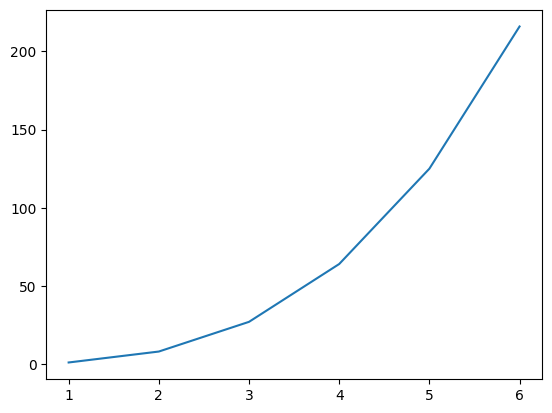

In [36]:

# Por defecto, la función Plot() dribujará un gráfico de lineas.
x = np.array([1,2,3,4,5,6])  # datos o variable x
y = np.power(x,3) # funcion Y
plt.plot(x,y)
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_11316\1066633232.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x, y,


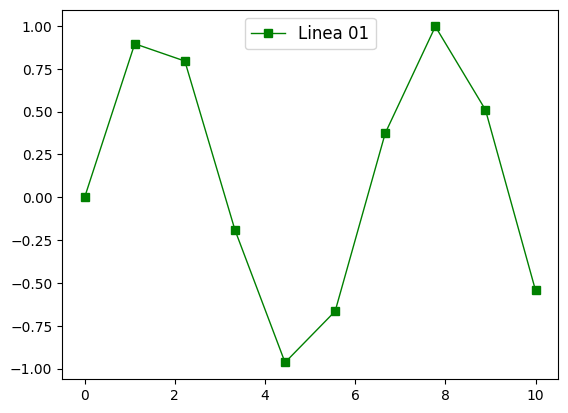

In [37]:
# Hacemos la función Seno
x = np.linspace(0, 10, 10)
y = np.sin(x) # Sine Graph

plt.plot(x, y,
         'go-',
           label='Linea 01',
           linewidth=1,
           marker='s')
plt.legend(loc='upper center', fontsize='large') # Añadir una leyenda

Caso aplicativo

C:\Users\pc\AppData\Local\Temp\ipykernel_11316\1078758693.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(


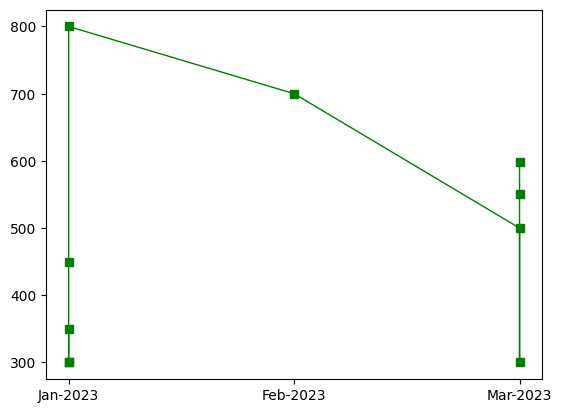

In [39]:
plt.plot(
          df_ventas["fecha_matricula"].sort_values(ascending=True).apply(lambda x: x.strftime('%b-%Y')), df_ventas["montofinalventa"],
         'go-',
          label='Linea 01',
          linewidth=1,
          marker='s'
        )

In [40]:
df_ventas["mes"]=df_ventas["fecha_matricula"].apply(lambda x: x.strftime('%b-%Y'))



C:\Users\pc\AppData\Local\Temp\ipykernel_11316\2873907143.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(


Text(0, 0.5, 'totalRecaudo')

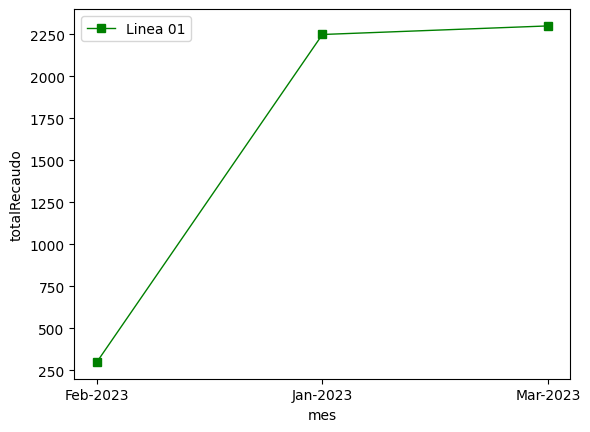

In [42]:
df_ventas_mes=df_ventas.groupby("mes").agg(totalRecaudo=("montofinalventa","sum")).reset_index()

plt.plot(
          df_ventas_mes["mes"].sort_values(ascending=True), df_ventas_mes["totalRecaudo"],
         'go-',
          label='Linea 01',
          linewidth=1,
          marker='s'
        )
plt.legend()
plt.xlabel("mes")
plt.ylabel("totalRecaudo")

Gráfico de Barras


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (4,).

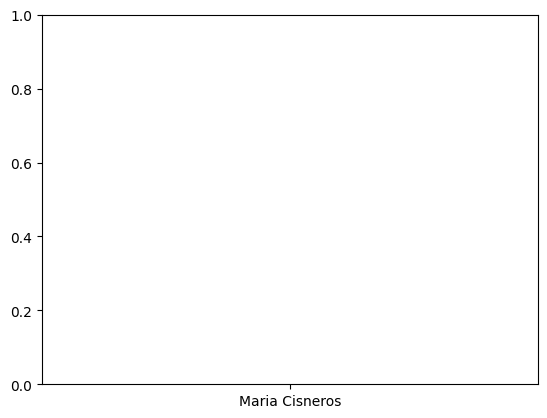

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = df_ventas["nombreVendedor"]
counts = [40, 100, 30, 55]

bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']


ax.bar(fruits, counts, label=bar_labels, color=bar_colors)


ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

In [ ]:
## agregacion y agrupación

## cantidad de ventas realizadas por un vendedor

cant_ventas=df_ventas.groupby('nombreVendedor').agg(cantidad_ventas=('nombreVendedor', 'count')).reset_index()

cant_ventas



,nombreVendedor,cantidad_ventas
0,Deisser Martinez,3
1,Fredy Saavedra,4
2,Maria Cisneros,3


/Users/luissolis/Documents/DAP6/ETL - Python - Bigquery/env_etl_python/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


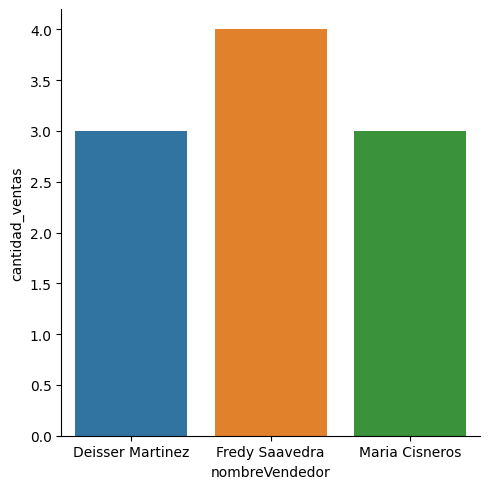

In [ ]:
import seaborn as sns
# crear la gráfica
sns.catplot(x='nombreVendedor',
            y='cantidad_ventas',
            data=cant_ventas,
            kind='bar')

In [ ]:

df_ventas_recaudo=df_ventas.groupby('nombreVendedor').agg(cantidad_ventas=('nombreVendedor', 'count'),
                                        total_recaudo=('costoVenta', 'sum')).reset_index()
df_ventas_recaudo

,nombreVendedor,cantidad_ventas,total_recaudo
0,Deisser Martinez,3,1849.0
1,Fredy Saavedra,4,2050.0
2,Maria Cisneros,3,950.0


/Users/luissolis/Documents/DAP6/ETL - Python - Bigquery/env_etl_python/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


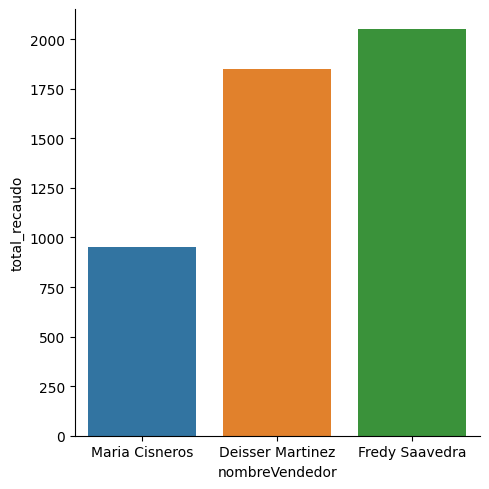

In [ ]:
sns.catplot(x='nombreVendedor',
            y='total_recaudo',
            data=df_ventas_recaudo,
            kind='bar',
            order=df_ventas_recaudo.sort_values('total_recaudo',ascending = True).nombreVendedor) # ordenar el gráfico


In [ ]:
df_ventas_recaudo

,nombreVendedor,cantidad_ventas,total_recaudo
0,Deisser Martinez,3,1849.0
1,Fredy Saavedra,4,2050.0
2,Maria Cisneros,3,950.0


In [ ]:
df_ventas_recaudo.sort_values('nombreVendedor',ascending = False)

,nombreVendedor,cantidad_ventas,total_recaudo
2,Maria Cisneros,3,950.0
1,Fredy Saavedra,4,2050.0
0,Deisser Martinez,3,1849.0


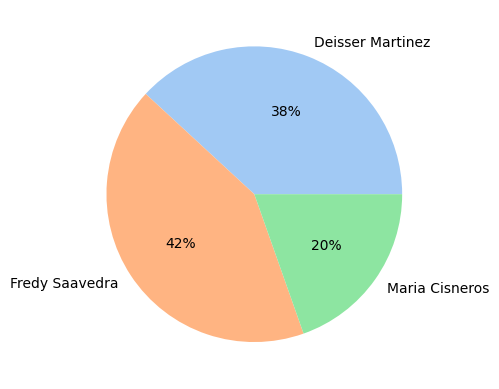

In [ ]:
#Definimos la paleta de colores con seaborn
import  matplotlib.pyplot as plt
colors = sns.color_palette('pastel')

#creamos el grafico de pastel con matplotlib
plt.pie(df_ventas_recaudo["total_recaudo"], # valores
        labels = df_ventas_recaudo["nombreVendedor"], #labels secciones
        colors = colors, autopct='%.0f%%')
plt.show()